In [1]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Part I. Gather Data
twitter_archive: The WeRateDogs Twitter archive, which is provides by the Udacity Course and I use pd.read_csv() to import them into dataframe.

image_predictions: The tweet image predictions, i.e., what breed of dog (or other objects, animal, etc.) is present in each tweet according to a neural network. This file ('image_predictions.tsv') is hosted on Udacity's servers and downloaded programmatically using the requests library and the provided url.

tweet_data: Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called 'tweet_json.txt' file. Each tweet's JSON data is written to its own line.

In [3]:
# Read in 1st dataset 
twitter_archive = pd.read_csv('twitter-archive-enhanced-2.csv')

In [4]:
# Use requests library to programmatically download the tsv file
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions_2.tsv', mode = 'wb') as file:
    file.write(response.content)

In [6]:
# Read in 2nd dataset 
image_predictions = pd.read_csv('image_predictions_2.tsv', delimiter = '\t')

In [7]:
# use tweepy to query Twitter's API and hide the API info here

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# set Twitter's rate limit
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [15]:
# Create a empty list for insert each tweet info into it
tweets = []

tweet_json = open('tweet-json.txt', 'r')

for line in tweet_json:
    tweet = json.loads(line)
    tweets.append(tweet)
    
tweet_json.close()

In [21]:
print(tweets[0])


{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [22]:
"""
We can see lots of information from 'tweet_json' above, but here I'm only focus on certain features, 
such as 'retweet_count', 'favorite_count', and of course 'id' for table merge. 
"""

tweet_data = pd.DataFrame()  # create a empty dataframe for map the tweet_data info 

tweet_data['id'] = list(map(lambda tweet: tweet['id'], tweets))

tweet_data['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets))

tweet_data['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets))

In [23]:
tweet_data.head()


,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Part 2. Assess Data
Inspecting data set for two things: data quality issues and lack of tidiness

Quality Issues means content issues like missing, duplicate, or incorrect data

Untidy Data has specific structural issues

In addition, four dimensions of data quality assessment help me guide the thought process while assessing the data. For example, Completeness: are there any missing data in specific rows or columns? Validity: are there any records not correct due to any reason? Accuracy: are there any extreme data or unusual data? Consistency: are they keep the consistence of scale standard or data type?

# twitter_archive

In [24]:
twitter_archive.head(5)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [25]:
twitter_archive.tail(5)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [26]:
# check the datatypes and find some datatypes need to be fixed
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [27]:
# set the display colwitdth for seeing the entire text contents
pd.set_option('display.max_colwidth', -1)
twitter_archive['text'].head()

0    This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                     
1    This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2    This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                 
3    This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                           
4    This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
Name: text, dtype: object

In [28]:
# total missing values for each features
twitter_archive.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

In [29]:
twitter_archive.name.str.islower().sum()


109

In [30]:
twitter_archive.describe()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [31]:
twitter_archive.rating_denominator.value_counts()
# 10 is the standard rating_denominator, other numbers could be errors

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [32]:
twitter_archive.rating_numerator.value_counts()
# some extreme values such as 420, 1776 could be errors

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [33]:
twitter_archive.source.value_counts()
# main source is iphone but the urls are not readable for human; this could be use to analyze in the last part

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

# image_predictions

In [34]:
image_predictions.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [35]:
image_predictions.tail()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [36]:
image_predictions.p1.value_counts()


golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
cocker_spaniel               30 
malamute                     30 
French_bulldog               26 
miniature_pinscher           23 
Chesapeake_Bay_retriever     23 
seat_belt                    22 
Siberian_husky               20 
Staffordshire_bullterrier    20 
German_shepherd              20 
web_site                     19 
Cardigan                     19 
teddy                        18 
Eskimo_dog                   18 
beagle                       18 
Maltese_dog                  18 
Shetland_sheepdog            18 
Rottweiler                   17 
Lakeland_terrier             17 
Shih-Tzu                     17 
kuvasz                       16 
Italian_greyhound            16 
          

In [37]:
image_predictions.info()
# all variables have 2075 records; no missing values here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [38]:
image_predictions.describe()


,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


# tweet_data

In [39]:
tweet_data.tail()


,id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [40]:
tweet_data.sort_values(['retweet_count'], ascending= 0)[0:5]


,id,retweet_count,favorite_count
1037,744234799360020481,79515,131075
259,842892208864923648,56625,0
533,807106840509214720,56625,107015
816,770743923962707968,52360,0
1077,739238157791694849,52360,75163


In [41]:
tweet_data = tweet_data.drop_duplicates()
# no missing valyues and all data type is integer

In [42]:
tweet_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 73.6 KB



# Cleaning Plan Summary
## Tidiness Issues
Columns 'doggo', 'floofer', 'pupper', 'puppo' in twitter_archive should belong to one colomn -- stage
Thetweet_data table need to merge into the twitter_archive table.
## Quality Issues
twitter_archive table
Some columns have huge amount of missing values, for example, "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp". Since I don't need in_reply and retweet data in this project, I perfer to delete those columns directly.

The varaible "expanded_urls" also has few missing values, which means some records had no images. Any ratings without images should not be taking into account.

The datatype of "timestamp" is not correct.

Optimize the source contents for human reading habit; change the long url links to certain words.

The standard for "rating_denominator" is 10, but it includes some other numbers, which could be the misparse.

The "rating_numerator" also has some incorrect values.

Some dog name are incorrect.

The dog names are sometimes first letter capital but sometimes not. Keep the name format consistent.

image_predictions table
The columns'names are not clear and straightforward such as p1,p2.
The prediction dog breeds involve both uppercase and lowercase for the first letter.

# Part 3. Clean Data

In [43]:
# make copies for cleaning
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_data_clean = tweet_data.copy()

# twitter_archive table
Tidiness Issue 1: Create a new variable – ‘stage’ to show the four dog stages, drop the four columns, and fill the empty with NaN.

Code

In [44]:
twitter_archive_clean[twitter_archive_clean['doggo'] == 'None'].head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


In [45]:
# use a for loop to replace all the 'None' before cat
stage = ['doggo','pupper', 'floofer', 'puppo' ]
for i in stage:
        twitter_archive_clean[i] = twitter_archive_clean[i].replace('None', '')

In [46]:
# use cat to combine 
twitter_archive_clean['stage'] = twitter_archive_clean.doggo.str.cat(twitter_archive_clean.floofer).str.cat(twitter_archive_clean.pupper).str.cat(twitter_archive_clean.puppo)

# drop the four old colomns
twitter_archive_clean = twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

# use np.nan to fill the empty
twitter_archive_clean['stage'] = twitter_archive_clean['stage'].replace('', np.nan)

## Test

In [47]:
twitter_archive_clean.sample(5)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
164,860184849394610176,NaN,NaN,2017-05-04 17:30:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Here we have perhaps the wisest dog of all. Above average with light sabers. Immortal as h*ck. 14/10 dog, or dog not, there is no try https://t.co/upRYxG4KbG",NaN,NaN,NaN,https://twitter.com/dog_rates/status/860184849394610176/photo/1,14,10,None,NaN
1546,689283819090870273,NaN,NaN,2016-01-19 03:10:43 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Chipson. He's aerodynamic af. No eyes (devastating). 9/10 would make sure he didn't bump into stuff https://t.co/V62rIva61J,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689283819090870273/photo/1,9,10,Chipson,NaN
2092,670782429121134593,NaN,NaN,2015-11-29 01:52:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This dude slaps your girl's ass what do you do?\n5/10 https://t.co/6dioUL6gcP,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670782429121134593/photo/1,5,10,None,NaN
987,749036806121881602,NaN,NaN,2016-07-02 00:27:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Dietrich. He hops at random. Other doggos don't understand him. It upsets him greatly. 8/10 would comfort https://t.co/U8cSRz8wzC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749036806121881602/photo/1,8,10,Dietrich,NaN
2075,670840546554966016,NaN,NaN,2015-11-29 05:43:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Colby. He's that one cool friend that gets you into every party. Great hat. Sneaky tongue slip. 10/10 good pup https://t.co/jBnz3MjTzX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670840546554966016/photo/1,10,10,Colby,NaN


In [48]:
print(twitter_archive_clean.shape)
print(twitter_archive.shape)

(2356, 14)
(2356, 17)


## Tidness Issue 2 Define : Merge the tweet_data into the twitter_archive using inner join.

## Code

In [49]:
# rename the 'id' from `tweet_data` in preparing for table join
tweet_data.rename(columns={'id': 'tweet_id'}, inplace = True)

# check the number of foreign key in two tables
print(twitter_archive_clean.tweet_id.count())
print(tweet_data.tweet_id.count())

2356
2354


In [50]:
# join two tables on 'tweet_id' and use inner join method
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_data, on='tweet_id', how = 'inner')

## Test

In [51]:
twitter_archive_clean.tweet_id.count()


2354

In [52]:
# drop the duplicates due to join
twitter_archive_clean = twitter_archive_clean.drop_duplicates()

In [53]:
print(twitter_archive_clean.tweet_id.count())
print(tweet_data.tweet_id.count())

2354
2354


In [54]:
twitter_archive_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 16 columns):
tweet_id                      2354 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2354 non-null object
source                        2354 non-null object
text                          2354 non-null object
retweeted_status_id           179 non-null float64
retweeted_status_user_id      179 non-null float64
retweeted_status_timestamp    179 non-null object
expanded_urls                 2295 non-null object
rating_numerator              2354 non-null int64
rating_denominator            2354 non-null int64
name                          2354 non-null object
stage                         379 non-null object
retweet_count                 2354 non-null int64
favorite_count                2354 non-null int64
dtypes: float64(4), int64(5), object(7)
memory usage: 312.6+ KB


## Quality Issue 1 Define : Remove all the unnecessary columns directly ('retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id', 'in_reply_to_user_id)


## Code

In [55]:
# drop the columns unnecessary and contain huge amount of missing data
columns_drop = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id',
               'in_reply_to_user_id', 'in_reply_to_user_id']

twitter_archive_clean = twitter_archive_clean.drop(columns_drop, axis = 1)

In [56]:
twitter_archive_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 11 columns):
tweet_id              2354 non-null int64
timestamp             2354 non-null object
source                2354 non-null object
text                  2354 non-null object
expanded_urls         2295 non-null object
rating_numerator      2354 non-null int64
rating_denominator    2354 non-null int64
name                  2354 non-null object
stage                 379 non-null object
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
dtypes: int64(5), object(6)
memory usage: 220.7+ KB


## Quality Issue 2 Define : Remove the records with no images information ('expanded_urls' is NaN)
## Code

In [57]:
# drop the 59 records without images 
twitter_archive_clean = twitter_archive_clean.dropna(subset = ['expanded_urls'])

## Test

In [59]:
twitter_archive_clean.expanded_urls.isnull().sum()


0

## Quality Issue 3 Define : Change the datatype of 'timestamp' to datetime
## Code

In [60]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])


## Test

In [62]:
twitter_archive_clean['timestamp'].head(3)


0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
Name: timestamp, dtype: datetime64[ns]

## Quality Issue 4 Define : Optimize the source content by ‘Twitter for iphone’, ‘Vine - Make a Scene’, ‘Twitter Web Client’, and ‘TweetDeck’.
## Code

In [63]:
twitter_archive_clean['source'].value_counts()

# Four types of source: Twitter for iphone / Vine - Make a Scene / Twitter Web Client / TweetDeck

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2161
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     32  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [64]:
# simpfy the source contexts
       
twitter_archive_clean['source'] = twitter_archive_clean['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                                                                          'Twitter for iphone')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
                                                                          'Vine - Make a Scene')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                                                                           'Twitter Web Client')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
                                                                           'TweetDeck')

# change the type of source to category for preparing later visualization
#twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')

## Test

In [65]:
twitter_archive_clean['source'].value_counts()


Twitter for iphone     2161
Vine - Make a Scene    91  
Twitter Web Client     32  
TweetDeck              11  
Name: source, dtype: int64

## Quality Issue 5 Define : 10 is the default value of ‘rating_denominator’, then correct the wrong values based on the corresponding text information.
## Code

In [66]:
twitter_archive_clean.rating_denominator.value_counts()


10     2276
11     3   
50     3   
80     2   
7      1   
170    1   
150    1   
130    1   
120    1   
110    1   
90     1   
70     1   
40     1   
20     1   
2      1   
Name: rating_denominator, dtype: int64

In [67]:
# filter the wrong rating_denominator values

df1 = twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10]

df1[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
432,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
515,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
783,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
900,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1066,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1118,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1163,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1200,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1226,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1252,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80


In [68]:
# tweet_id : 740373189193256964,722974582966214656,716439118184652801,682962037429899265,666287406224695296

twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964, ['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 722974582966214656, ['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 716439118184652801, ['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 682962037429899265, ['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 666287406224695296, ['rating_denominator']] = 10

## Test

In [69]:
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
1066,740373189193256964,2016-06-08 02:41:38,Twitter for iphone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,10,None,NaN,9220,20648


## Quality Issue 6 Define : Correct the 'rating_numerator' values from the text information
## Code

In [70]:
# tweet_id : 740373189193256964,722974582966214656,716439118184652801,682962037429899265,666287406224695296

twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964, ['rating_numerator']] = 14
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 722974582966214656, ['rating_numerator']] = 13
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 716439118184652801, ['rating_numerator']] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 682962037429899265, ['rating_numerator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 666287406224695296, ['rating_numerator']] = 9

## Test

In [71]:
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
1066,740373189193256964,2016-06-08 02:41:38,Twitter for iphone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",14,10,None,NaN,9220,20648


## Quality Issue 7 Define : Change the frequent incorrect dog name to None
## Code

In [72]:
twitter_archive_clean['name'].value_counts().head(10)
# it shows that  it has lots of missing values in name and "a" is even not a name

None       685
a          55 
Charlie    12 
Cooper     11 
Lucy       11 
Oliver     11 
Penny      10 
Tucker     10 
Lola       10 
Bo         9  
Name: name, dtype: int64

In [73]:
# choose the most frequent incorrect dog name and set them as None
not_name_list = ['a','the','an']
for i in not_name_list:
        twitter_archive_clean['name'].replace(i, 'None', inplace=True)

## Test

In [74]:
twitter_archive_clean['name'].value_counts().head(10)


None       755
Charlie    12 
Cooper     11 
Lucy       11 
Oliver     11 
Tucker     10 
Penny      10 
Lola       10 
Winston    9  
Bo         9  
Name: name, dtype: int64

## Quality Issue 8 Define : Capitalize the first letter of dog name for consistence.
## Code

In [75]:
twitter_archive_clean['name'].str.islower().sum()


39

In [76]:
twitter_archive_clean['name'] = twitter_archive_clean.name.str.capitalize()


## Test

In [77]:
twitter_archive_clean['name'].str.islower().sum()


0

## image_predictions table
## Quality Issue 9 Define : Change the column names for better readability in image_predictions.

In [78]:
image_predictions.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Code

In [79]:
# change the column names
image_predictions.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace = True)

## Test

In [80]:
image_predictions.head()


,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True



## Quality Issue 10 Define : Capitalize the first letter of first prediction (I could do that for all the predictions, but I decide to only apply to the first prediction since this variable is the important one).

In [81]:
image_predictions['first_prediction'] = image_predictions.first_prediction.str.capitalize()


In [82]:
image_predictions.head()


,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [83]:
image_predictions['first_prediction'].value_counts().head(10)


Golden_retriever      150
Labrador_retriever    100
Pembroke              89 
Chihuahua             83 
Pug                   57 
Chow                  44 
Samoyed               43 
Toy_poodle            39 
Pomeranian            38 
Malamute              30 
Name: first_prediction, dtype: int64

## Final Tests

In [84]:
twitter_archive_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2295 entries, 0 to 2353
Data columns (total 11 columns):
tweet_id              2295 non-null int64
timestamp             2295 non-null datetime64[ns]
source                2295 non-null object
text                  2295 non-null object
expanded_urls         2295 non-null object
rating_numerator      2295 non-null int64
rating_denominator    2295 non-null int64
name                  2295 non-null object
stage                 373 non-null object
retweet_count         2295 non-null int64
favorite_count        2295 non-null int64
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 215.2+ KB


In [85]:
image_predictions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id             2075 non-null int64
jpg_url              2075 non-null object
img_num              2075 non-null int64
first_prediction     2075 non-null object
first_confidence     2075 non-null float64
first_dog            2075 non-null bool
second_prediction    2075 non-null object
second_confidence    2075 non-null float64
second_dog           2075 non-null bool
third_prediction     2075 non-null object
third_confidence     2075 non-null float64
third_dog            2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# Store

In [86]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8')


# Analyze and Visualize

In [87]:
twitter_archive_clean.head(3)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27,Twitter for iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,6514,33819
2,891815181378084864,2017-07-31 00:18:03,Twitter for iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,4328,25461


# 1. The Distribution of Source

Twitter for iphone     2161
Vine - Make a Scene    91  
Twitter Web Client     32  
TweetDeck              11  
Name: source, dtype: int64


Text(0.5, 1.0, 'The Distribution of Source')

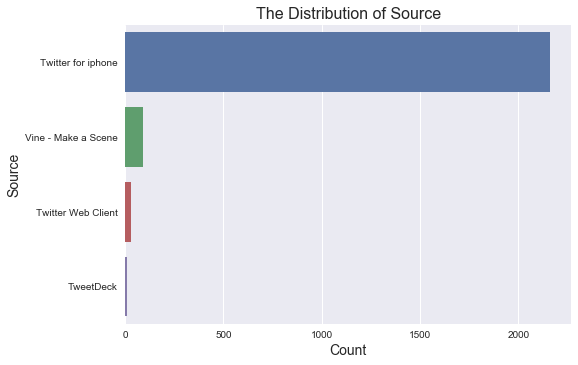

In [88]:
sorted_source = twitter_archive_clean['source'].value_counts().index
print(twitter_archive_clean['source'].value_counts())
sns.set(style="darkgrid")
sns.countplot(data = twitter_archive_clean, y = 'source', order = sorted_source)
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Source', fontsize=14)
plt.title('The Distribution of Source',fontsize=16)

This plot above shows the distribution of source. We can see that the dominate source of tweets is from iPhone twitter app, which is 94% in the total. That means the twitter app is the main channel for people using to tweet, retweet, post, and others, while the TweetDesk is pretty rare (less than 1%).

# 2. The Distribution of Dog Stages

Text(0.5, 1.0, 'The Distribution of Dog Stages')

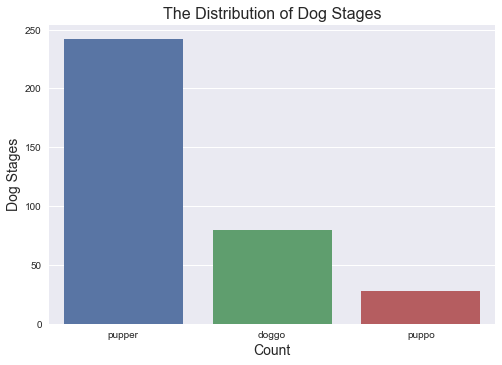

In [89]:
sorted_stage = twitter_archive_clean['stage'].value_counts().head(3).index
sns.set(style="darkgrid")
sns.countplot(data = twitter_archive_clean, x = 'stage', order = sorted_stage, orient = 'h')
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Dog Stages', fontsize=14)
plt.title('The Distribution of Dog Stages',fontsize=16)

Similarly, I check the distribution of dog stages. It shows that ‘pupper’ (a small doggo, usually younger) is the most popular dog stage, followed by ‘doggo’ and ‘puppo’. It could be due to the young and unmatured dog is usually cuter than the adult dog. It should also be noticed that there’s huge amount missing data in dog stages, thus the distribution may not reflect the truth.

# 3. Retweet_count and favorite_count

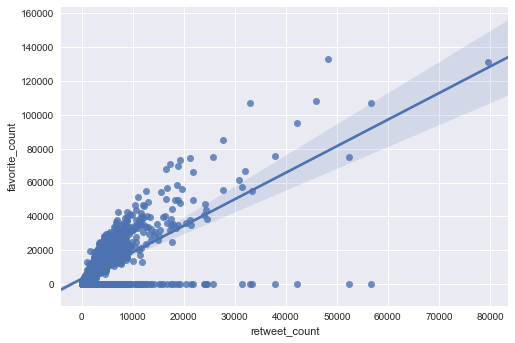

In [90]:
sns.regplot(x="retweet_count", y="favorite_count", data=twitter_archive_clean)


A reasonable hypothesis is that most popular tweets usually get a large number of retweets and favorite counts. I test the correlation between ‘retweet_count’ and ‘favorite_count’. The pearson r^2 is 0.759, that is a high value showing a strong positive relationship between ‘retweet_count’ and ‘favorite_count’. The plot below confirms this hypothesis.

# 4. The Classification of Dogs Results Analysis

In [91]:
image_predictions.head(3)


,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


The ‘image_predictions’ table stores the result of a classification of dog breeds through a neural network. I am curious about the how this model works? What’s the accuracy of this model? Therefore, I analyze and visualize the results in below.

In [92]:
image_predictions['first_prediction'].value_counts().head(10)


Golden_retriever      150
Labrador_retriever    100
Pembroke              89 
Chihuahua             83 
Pug                   57 
Chow                  44 
Samoyed               43 
Toy_poodle            39 
Pomeranian            38 
Malamute              30 
Name: first_prediction, dtype: int64

These breeds above are the top 10 dog breeds this model predicted. Golden retriever and Labrador retriever are top 2 and both over 100 predictions. It could be because those two are most common breeds in U.S. We have more image data on those breeds, and thus trained a better result.

D:\anaconda\lib\site-packages\seaborn\distributions.py:215: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
D:\anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


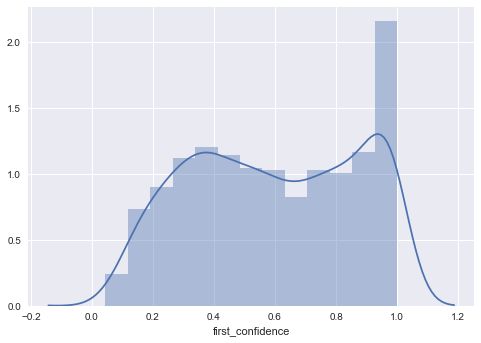

In [93]:
sns.set(style='darkgrid')
ax = sns.distplot(image_predictions['first_confidence'])

(-1.1086866580463621,
 1.1197796704326126,
 -1.1183657634231952,
 1.1101005650557796)

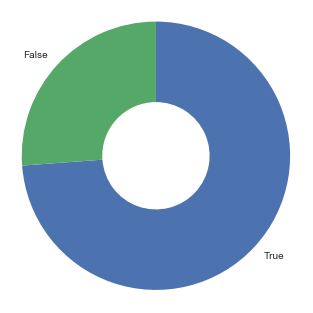

In [94]:
sns.set(style='darkgrid')
sorted_p1 = image_predictions['first_dog'].value_counts()
plt.pie(sorted_p1, labels = sorted_p1.index, startangle = 90, counterclock = False,
       wedgeprops = {'width': 0.6})
plt.axis('square')

The first plot above shows the prediction success rate of whether or not first prediction is a breed of dog. The pie chart indicates almost 2/3 situations the predictions are correct, even though this result is not good enough for a deep learning model. The second plot shows how confident the algorithm is in its first prediction. We can see 100% is the most cases, however the amounts of 0.1 to 0.8 dominate the entire distribution. That also could suggest that the model is not good enough.